In [242]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft as ft
import scipy.stats
import pandas as pd
import random
plt.style.use('seaborn')

In [243]:
"sx - сигнал, hx - передаточная функция"
df = pd.read_csv('sig07.dat',sep='\s+', names=['x','sx','hx'])
df.head(10)

,x,sx,hx
0,-16.000000,-0.079861,-0.0
1,-15.996094,0.010090,-0.0
2,-15.992188,-0.141093,-0.0
3,-15.988281,-0.046915,-0.0
4,-15.984375,0.133125,-0.0
5,-15.980469,-0.035027,-0.0
6,-15.976563,-0.157606,-0.0
7,-15.972656,-0.002028,-0.0
8,-15.968750,0.021802,-0.0
9,-15.964844,0.170577,-0.0


In [244]:
x = np.array(df['x'])
s = np.array(df['sx'])
h = np.array(df['hx'])

In [245]:
N = 2** 13
X = 32
dx = X/N
dw = 2*np.pi/X

In [246]:
d= x[1] -x[0]
d

0.003906000000000631

In [247]:
dx

0.00390625

In [248]:
w = np.linspace(-N/2,N/2,N)
w *= dw
print(w)

[-804.24771932 -804.05134581 -803.85497229 ...  803.85497229  804.05134581
  804.24771932]


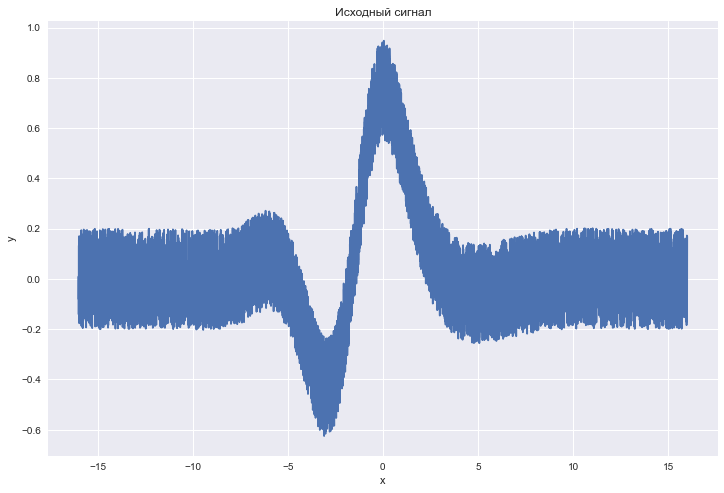

In [249]:
plt.figure(figsize=(12,8))
plt.plot(x,s,label = 'Исходный сигнал')
plt.title('Исходный сигнал')
plt.xlabel('x')
plt.ylabel('y')
# plt.savefig()
plt.savefig('6_1.png')

Text(0.5, 1.0, 'Передаточная функция')

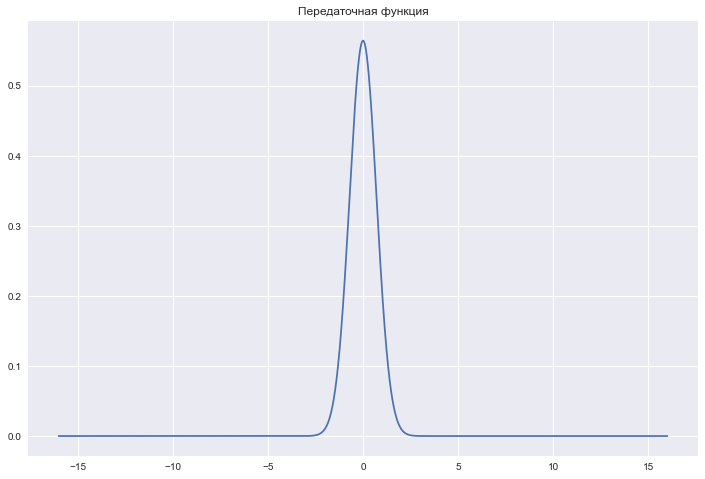

In [250]:
plt.figure(figsize=(12,8))
plt.plot(x,h,label='Передаточная функция')
plt.title('Передаточная функция')


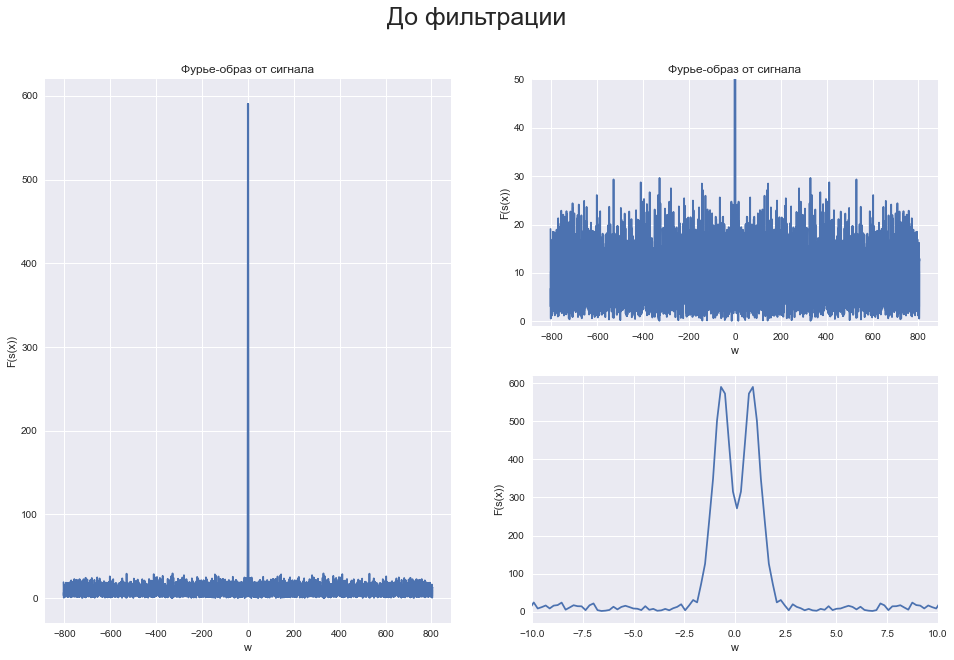

In [251]:
# fs = ft.fftshift(ft.fft(s))
fs = ft.fftshift(ft.fft(ft.fftshift(s)))
fig = plt.figure(figsize=(16,10))
fig.suptitle('До фильтрации',fontsize=25)

ax1 = fig.add_subplot(1,2,1)
ax1.plot(w,np.abs(fs))
plt.xlabel('w')
plt.ylabel('F(s(x))')
plt.title('Фурье-образ от сигнала')
# plt.savefig('6_2.png')
# plt.show()

# fs = ft.fftshift(fs)
ax2 = fig.add_subplot(2,2,2)
# plt.figure(figsize=(12,8))
# plt.subplot(2,1,2)
# ax2 = plt.subplot(2,1,1)
ax2.plot(w,np.abs(fs))
plt.xlabel('w')
plt.ylabel('F(s(x))')
plt.ylim(top = 50,bottom=-1)
plt.title('Фурье-образ от сигнала')
# plt.savefig('6_3.png')
# plt.show()
ax3 = fig.add_subplot(2,2,4)
# plt.figure(figsize=(12,8))
# ax3 = plt.subplot(1,2,2)
ax3.plot(w,np.abs(fs))
plt.xlabel('w')
plt.ylabel('F(s(x))')
# plt.ylim(top = 50,bottom=-1)
plt.xlim(left=-10,right=10)
plt.savefig('6_2.png')
plt.show()
idx0 = np.where(np.abs(fs)<50)
fs[idx0] = 0

In [252]:
fh = ft.fftshift(ft.fft(ft.fftshift(h)))
# fh = ft.fftshift(ft.fft(h))

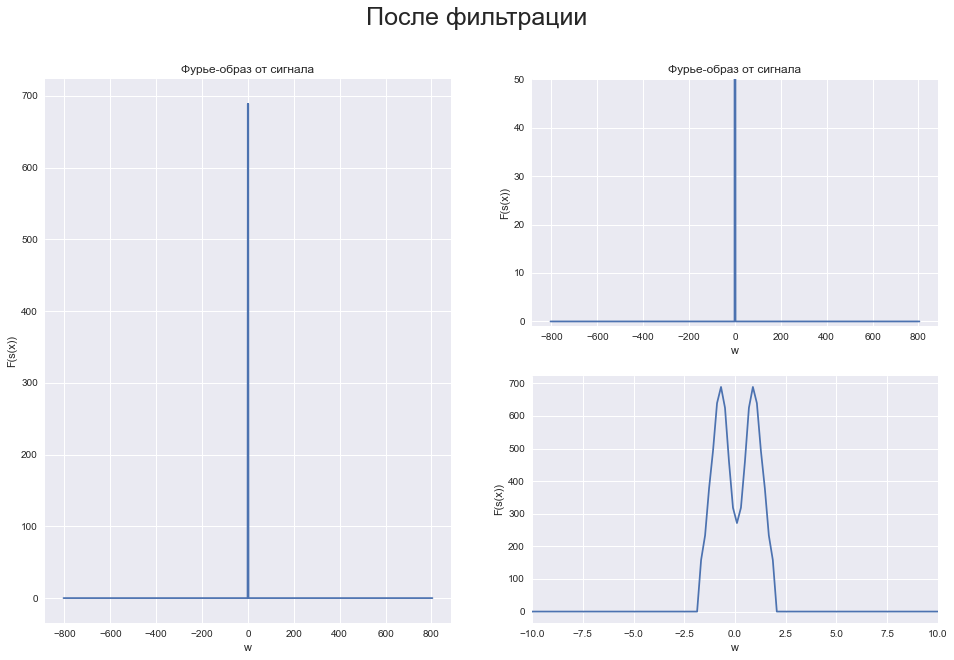

In [253]:
fs = fs/fh/dx

fig = plt.figure(figsize=(16,10))
fig.suptitle('После фильтрации',fontsize=25)
ax1 = fig.add_subplot(1,2,1)
ax1.plot(w,np.abs(fs))
plt.xlabel('w')
plt.ylabel('F(s(x))')
plt.title('Фурье-образ от сигнала')
# plt.savefig('6_2.png')
# plt.show()

# fs = ft.fftshift(fs)
ax2 = fig.add_subplot(2,2,2)
# plt.figure(figsize=(12,8))
# plt.subplot(2,1,2)
# ax2 = plt.subplot(2,1,1)
ax2.plot(w,np.abs(fs))
plt.xlabel('w')
plt.ylabel('F(s(x))')
plt.ylim(top = 50,bottom=-1)
plt.title('Фурье-образ от сигнала')
# plt.savefig('6_3.png')
# plt.show()
ax3 = fig.add_subplot(2,2,4)
idx0 = np.where(np.abs(fs)<50)
fs[idx0] = 0
# plt.figure(figsize=(12,8))
# ax3 = plt.subplot(1,2,2)
ax3.plot(w,np.abs(fs))
plt.xlabel('w')
plt.ylabel('F(s(x))')
# plt.ylim(top = 50,bottom=-1)
plt.xlim(left=-10,right=10)
plt.savefig('6_3.png')
plt.show()



/home/nomadpd/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/nomadpd/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


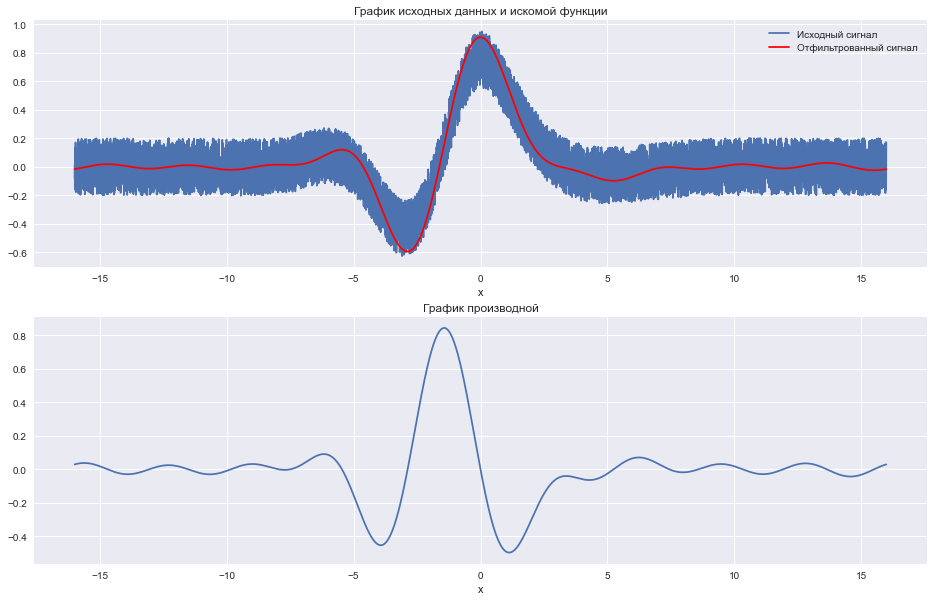

In [254]:
ff = 1j * w * fs

fs = ft.ifftshift(ft.ifft(ft.ifftshift(fs)))
plt.figure(figsize=(16,10))
plt.xlabel('x')
plt.subplot(2,1,1)
plt.plot(x,s,label = 'Исходный сигнал')
plt.plot(x,fs,color='r',label='Отфильтрованный сигнал')
plt.title('График исходных данных и искомой функции')
plt.xlabel('x')
plt.legend()

# plt.ylim(top = 50,bottom=-1)
plt.subplot(2,1,2)
ff = ft.fftshift(ft.ifft(ft.fftshift(ff)))
plt.plot(x,ff)
plt.title('График производной')
plt.xlabel('x')
plt.savefig('#6_4_2v1')
plt.show()